<img style="float:right;" src="https://www.tudublin.ie/media/website/site-assets/images/tu-dublin-logo-blue.svg">

_by  <a href="mailto:X00193937@mytudublin.ie">Jorge Jimenez Garcia</a>_ : X00193937

# Table of contents:

* [Introduction](#p1)
    * [Motivation](#p1.1)
    * [Dataset overview](#p1.2)
    * [Imports and tools used](#p1.3)
    * [Data Quality](#p1.4)
* [Exploratory Data Analysis](#p2)
    * [Preliminary Transformations](#pt2.1)
    * [The members of the Dataset](#pt2.2)
    * [Stats per city zones](#pt2.3)
* [Measures of Relatedness](#pt3)
    * [Study on the relationship between accessible modes of transportation and zones of NYC](#pt3.1)
        * [Finding a candidate variable](#pt3.1.1)
        * [Correlation analysis](#pt3.1.2)
        * [Hypothesis testing](#pt3.1.3)
        * [Study conclusions](#pt3.1.4)

# Introduction
<a name='p1'></a>

## Motivation
<a name='p1.1'></a>

In light of the recent climate crisis, alternative and sustainable modes of transportation rise as a valuable option to lower a city's carbon footprint. Additionally, there have been recent discussions on the walkability and accessibility of cities in relation to their quality of life. With so many important topics related to transportation in the spotlight, I thought it would be fit to examine datasets regarding it.

To this end, we will study New York City's Citywide Mobility Survey, or CMS for short. NYC was picked for generally being understood to be a transport friendly city, and being a big city, it allows the city to collect a wide variety of diverse information about its citizens.

[The New York CMS](https://data.cityofnewyork.us/browse?q=Citywide%20Mobility%20Survey&sortBy=relevance) is a yearly survey on the city's population to assess the citizen's view of transport, their usage and other demographic data about public and private transport users and is conducted by the Department of Transportation. This survey is comprised of several different dataset that contain information about the respondent, their household, each individual trip they made or their vehicles.

In this project, we will study the [Person data from the 2019 version of the report](https://data.cityofnewyork.us/Transportation/Citywide-Mobility-Survey-Person-Survey-2019/6bqn-qdwq). 

## Dataset
<a name='p1.2'></a>

The CMS survey is a statistically valid sample of nearly 3000 residents of NYC across the 10 designed geographic survey zones, with approximately 300 respondents per zone. It also contains incomplete information about the member in the respondent's household. (3346 respondents, 8286 person entries) 

The survey contains a variety of attributes regarding the survey's result, as well as general information about the survey's respondents. With a total of 165 attributes, we will not make use of all of them, but some that might be of use are as follow:

* __cms\_zone__: Categorical; The area where the respondent lives, from a set of predefined areas by the Department of Transportation (Inner Brooklyn, Middle Queens, Outer Queens, Manhattan Core, Northern Bronx, Northern Manhattan, Outer Brooklyn, Staten Island, Inner Queens, Southern Bronx)
* __num\_trips__: Discrete; The number of trips a person made for the survey's duration
* __num_walk_trips__: Discrete; The number of trips done on foot
* __num_transit_trips__: Discrete; The number of trips made using public transport
* __num_bike_trips__: Discrete; The number of trips made by bike
* __num_taxi_trips__: Discrete; The number of trips made by taxi
* __num_tnc_trips__: Discrete; The number of trips made using a vehicle-for-hire service (eg. Uber, Lyft, etc.)
* __age__: Categorical; The age of the respondent, in ranges (Under 5, 5 to 15, 16 to 17, 18 to 24, 25 to 34, etc.)
* __employment__: Categorical; Type of employment (Full-time, Part-time, Self-employed, Not employed, Unpaid Volunteer or Intern)
* __student__: Categorical; If the respondent is currently a student and of what type (Not a student, Full-time, Part-time)
* __work_cms_zone__: Categorical; The area where the respondent works (Inner Brooklyn, Middle Queens, Outer Queens, Manhattan Core, Northern Bronx, Northern Manhattan, Outer Brooklyn, Staten Island, Inner Queens, Southern Bronx)
* __work\_mode__: Typical mode of transportation to work (Walk, Other, Household Vehicle, Rental/Carshare/Work Vehicle, Bus, Ferry, Rail, Taxi or TNC, Scooter)

[_This information is sourced from the CMS's Data Dictionary_](https://data.cityofnewyork.us/api/views/6bqn-qdwq/files/038d8557-22ba-4268-b323-d03ea3c82a88?download=true&filename=Open%20Data%20Dictionary_CMS%20%20Person%20Survey%202019.xlsx)

In [1]:
import pandas as pd

attributes = ['num_days','cms_zone', 'num_trips', 'num_walk_trips', 'num_transit_trips', 'num_bike_trips', 
              'num_taxi_trips', 'num_tnc_trips','age','gender','employment','student',
              'work_cms_zone','work_mode']

df = pd.read_csv('Citywide_Mobility_Survey_-_Person_Survey_2019.csv')[attributes]
print(df.shape[0])
df.head(10)

8286


,num_days,cms_zone,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,age,gender,employment,student,industry,work_cms_zone,work_mode
0,NaN,Inner Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,9,995,3,0,995,NaN,995
1,NaN,Inner Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,8,995,6,0,995,NaN,995
2,7.0,Inner Brooklyn,23.0,1.0,3.0,11.0,0.0,0.0,5,1,6,1,995,NaN,995
3,NaN,Middle Queens,NaN,NaN,NaN,NaN,NaN,NaN,8,995,1,0,995,NaN,995
4,NaN,Middle Queens,NaN,NaN,NaN,NaN,NaN,NaN,7,995,6,0,995,NaN,995
5,7.0,Middle Queens,15.0,2.0,1.0,0.0,0.0,0.0,5,2,2,2,8,NaN,100
6,7.0,Middle Queens,30.0,22.0,9.0,0.0,0.0,0.0,7,1,7,0,15,NaN,105
7,NaN,Middle Queens,NaN,NaN,NaN,NaN,NaN,NaN,5,995,2,0,995,NaN,995
8,NaN,Middle Queens,NaN,NaN,NaN,NaN,NaN,NaN,9,995,3,0,995,NaN,995
9,NaN,Middle Queens,NaN,NaN,NaN,NaN,NaN,NaN,5,995,6,0,995,NaN,995


## Imports
<a name='p1.3'></a>

For analysis, we will use the standard data analysis Python toolkit 

In [2]:
# Pandas already was imported to show an overview of the dataset
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pingouin

from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

from IPython.display import Image

## Data Quality
<a name='p1.4'></a>

As previously mentioned, the survey dataset contains both respondents and their household's members. Since this survey is on a person-by-person basis, there is no information to be gained from their household members, who additionally did not answer said survey and therefore have missing data on almost all of the attributes we are interested in. We can easily identify household members using this fact, and they will be removed from the dataset, since they were only included as part of the bigger CMS dataset.

Some other attributes will be reworked to have clearer data, for instance the number of trips by car is understood to be `num_trips`, since it seems the attribute does not represent the total, but the codebook does not specify the mode of transportation used, and no other mode remains. 

In [3]:
df.rename(columns = { 'num_trips': 'num_car_trips' }, inplace=True )

Finally, we give attributes the correct types, since most are interpreted as numeric by default

In [4]:
for attr in ['cms_zone','age','gender','employment','student','industry','work_cms_zone','work_mode']:
    df[attr] = df[attr].astype('category')
df.dtypes

num_days              float64
cms_zone             category
num_car_trips         float64
num_walk_trips        float64
num_transit_trips     float64
num_bike_trips        float64
num_taxi_trips        float64
num_tnc_trips         float64
age                  category
gender               category
employment           category
student              category
industry             category
work_cms_zone        category
work_mode            category
dtype: object

### Missing Data

In [5]:
df.isna().sum()

num_days             4940
cms_zone                0
num_car_trips        4940
num_walk_trips       4940
num_transit_trips    4940
num_bike_trips       4940
num_taxi_trips       4940
num_tnc_trips        4940
age                     0
gender                  0
employment              0
student                 0
industry                0
work_cms_zone        6599
work_mode               0
dtype: int64

As we can see from the missing data analysis, there are 4940 instances of the `num_trips` attributes that are identified as missing or incomplete. These are actually the household members of the actual survey respondent. This matches up with the information reported in the codebook and previously mentioned, where it is stated that the dataset contains 3346 survey respondents (Total of 8286 instances, 4940 were 'missing' or 'non aplicable' instances so the 3346 respondents remain)

This leaves the missing values in `work_cms_zone` to address. These probably correspond to unemployed survey respondents, or those who do not work in the city. This means we have to avoid dropping the NaN instances in `work_cms_zone`, since it could be important to discern between, for example, workers who work inside the city and those that do not.

In [6]:
miss = ['num_car_trips', 'num_walk_trips', 'num_transit_trips', 'num_bike_trips', 'num_taxi_trips', 'num_tnc_trips']
df[miss] = df[miss].mask( df[miss].isna(), np.nan)
df.dropna(subset=miss,inplace=True)
df.reset_index(drop=True, inplace=True)

We double check that we did not drop the relevant NaN instances in `work_cms_zone`, which also contains survey respondents who reside but do not work in New York City

In [7]:
assert df.isna().sum()['work_cms_zone'] > 0

To obtain proper standardized metrics across survey subjects and to ensure participants who have given us data for longer do not skew the values, we divide all of these metrics by the number of days a respondent has participated in the survey, contained in the `num_days` column

In [8]:
cols = ['num_car_trips', 'num_walk_trips', 'num_transit_trips', 'num_bike_trips', 'num_taxi_trips', 'num_tnc_trips']
n_days = df['num_days']

for c in cols:
    df[ 'mean_' + c + '_per_day' ] = df[ c ] / n_days

df

,num_days,cms_zone,num_car_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,age,gender,...,student,industry,work_cms_zone,work_mode,mean_num_car_trips_per_day,mean_num_walk_trips_per_day,mean_num_transit_trips_per_day,mean_num_bike_trips_per_day,mean_num_taxi_trips_per_day,mean_num_tnc_trips_per_day
0,7.0,Inner Brooklyn,23.0,1.0,3.0,11.0,0.0,0.0,5,1,...,1,995,NaN,995,3.285714,0.142857,0.428571,1.571429,0.0,0.000000
1,7.0,Middle Queens,15.0,2.0,1.0,0.0,0.0,0.0,5,2,...,2,8,NaN,100,2.142857,0.285714,0.142857,0.000000,0.0,0.000000
2,7.0,Middle Queens,30.0,22.0,9.0,0.0,0.0,0.0,7,1,...,0,15,NaN,105,4.285714,3.142857,1.285714,0.000000,0.0,0.000000
3,7.0,Middle Queens,48.0,23.0,13.0,0.0,0.0,0.0,6,2,...,0,16,Manhattan Core,105,6.857143,3.285714,1.857143,0.000000,0.0,0.000000
4,7.0,Middle Queens,45.0,13.0,6.0,12.0,0.0,2.0,5,1,...,2,13,Inner Queens,103,6.428571,1.857143,0.857143,1.714286,0.0,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,1.0,Staten Island,2.0,0.0,2.0,0.0,0.0,0.0,6,1,...,0,15,NaN,995,2.000000,0.000000,2.000000,0.000000,0.0,0.000000
3342,1.0,Staten Island,0.0,0.0,0.0,0.0,0.0,0.0,8,2,...,0,12,NaN,100,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3343,1.0,Staten Island,3.0,0.0,0.0,0.0,0.0,0.0,7,2,...,0,1,Manhattan Core,102,3.000000,0.000000,0.000000,0.000000,0.0,0.000000
3344,1.0,Staten Island,4.0,0.0,2.0,0.0,0.0,1.0,4,2,...,0,7,Outer Brooklyn,105,4.000000,0.000000,2.000000,0.000000,0.0,1.000000


# Exploratory Data Analysis
<a name='pt2'></a>

## Preliminary Transformations
<a name='pt2.1'></a>

We also will transform some of the values that denote a categorical value such as gender or a range like for age and that were encoded using numbers into text, to have clearer tables and visualizations. The values for each were taken from the dataset's codebook.

In [9]:
df.sort_values(by='age', inplace=True)

def transform_age(x):
    if x == 1:
        return 'Under 5'
    elif x == 2:
        return '5-15'
    elif x == 3:
        return '16-17'
    elif x == 4:
        return '18-24'
    elif x == 5:
        return '23-34'
    elif x == 6:
        return '33-44'
    elif x == 7:
        return '45-54'
    elif x == 8:
        return '55-64'
    elif x == 9:
        return '65-74'
    elif x == 10:
        return '75-84'
    elif x == 11:
        return '85+'
    else:
        'Did not respond'
        
def transform_gender(x):
    if x == 1:
        return 'Female'
    elif x == 2:
        return 'Male'
    elif x == 4:
        return 'Non-Binary'
    elif x == 997:
        return 'Other'
    elif x == 999:
        return 'Prefer not to answer'
    else:
        'Did not respond'

df['age'] = df['age'].apply(transform_age)
df['gender'] = df['gender'].apply(transform_gender)

## The members of the dataset
<a name='pt2.2'></a>

We now explore demographic statistics hoping to assert if the population on the dataset is balanced and statistically representative of New York City, as the dataset codebook claims.

In [10]:
pd.crosstab(df.age, df.gender)

gender,Female,Male,Non-Binary,Other,Prefer not to answer
age,,,,,
18-24,129,101,9,0,14
23-34,404,320,3,2,20
33-44,381,267,2,0,14
45-54,329,261,1,0,21
55-64,301,248,0,0,6
65-74,182,175,0,0,4
75-84,64,58,1,0,2
85+,16,10,1,0,0


From the information in the contingency table we can see that the population of the dataset contains more Female than Male participants across all age groups, and that other genders have what would correspond as an equal representation on the dataset as in the general population. 

This falls in line with previous census data from 2014 that states that the ratio of Males to Females is 94:100 [(1)](https://www.states101.com/gender-ratios/new-york/new-york-county), and was projected to increase [(2)](https://www.census.gov/quickfacts/fact/table/newyorkcitynewyork/SEX255221#SEX255221)

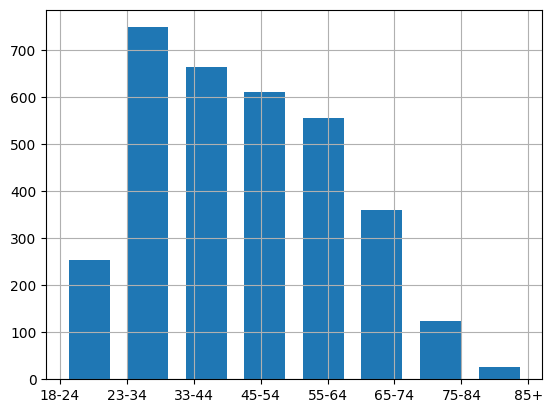

In [11]:
df['age'].hist(rwidth=0.7, bins=8)
plt.show()

This lines up with the typical age distribution for cities nowadays, and verifies the claim that the survey was representative of the population. Below is the breakdown of population in age ranges for 2021 [(source)](https://www.statista.com/statistics/911456/new-york-population-share-age-group/). 

_Note that the graph shown  uses different age groups_

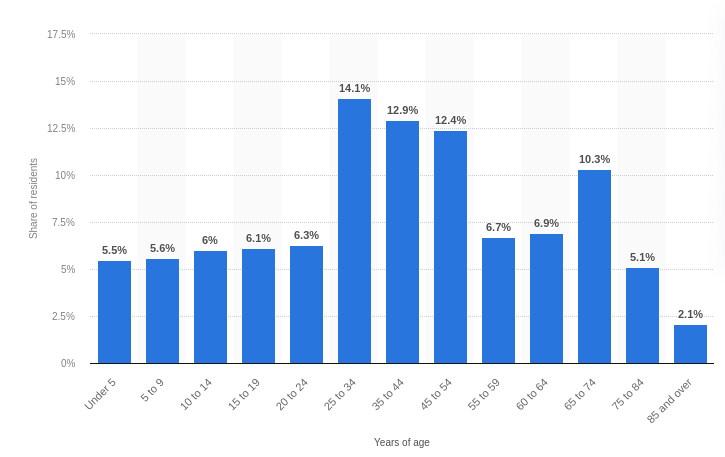

In [12]:
Image('Report Images/NYC Age graph 2021.png')

Next, we will explore the number of survey respondents in each zone of New York City.

In [13]:
df['cms_zone'].value_counts()

Northern Bronx        416
Staten Island         373
Outer Queens          361
Southern Bronx        346
Northern Manhattan    315
Inner Brooklyn        314
Outer Brooklyn        312
Middle Queens         310
Manhattan Core        301
Inner Queens          298
Name: cms_zone, dtype: int64

Like before, the majority of zones have more or less the same representation. Northern Bronx, Staten Island, Outer Queens and Southern Bronx stand out as having more representation than the rest outside a reasonable margin. We will have to keep this overrepresentation in mind.

## Stats per city zones
<a name='pt2.3'></a>

Next, having talked about the composition of our dataset, we will explore statistics grouped by city zones.

Continuing on the analysis of the surveyed sample, we will look at the paricipation level of survey respondents by city zone. To do this, we do hypothesis testing of the number of days a subject participated between the different city zones. To begin, we test if the groups of the variable are normally distributed.

In [31]:
pingouin.normality(df, dv='num_days', group='cms_zone')

,W,pval,normal
Northern Bronx,0.552086,3.250075e-31,False
Middle Queens,0.557649,2.779538e-27,False
Southern Bronx,0.510362,7.942295e-30,False
Staten Island,0.564898,1.991489e-29,False
Outer Brooklyn,0.578327,7.826273e-27,False
Northern Manhattan,0.509746,1.232326e-28,False
Outer Queens,0.553516,2.644615e-29,False
Inner Brooklyn,0.503972,9.947843e-29,False
Manhattan Core,0.563600,8.951219e-27,False
Inner Queens,0.487398,1.926791e-28,False


Since they are not, we use Kruskal-Wallis as our test for non-parametric distributions

In [32]:
pingouin.kruskal(df, dv='num_days', between='cms_zone')

,Source,ddof1,H,p-unc
Kruskal,cms_zone,9,20.55694,0.01477


The Kruskal-Wallis test reveals that within a 99% confidence interval, we fail to reject the null hypothesis $H_0$  
($\chi^2=20.557, p=0.0147, df=9$). Therefore, we cannot say there was a signifficant difference in the levels of participation across city zones.

We can conclude that the surveyed population is representative of the citizens of New York City, and we move on to study metrics related to the usage of different modes of transportation, separated per city zones.

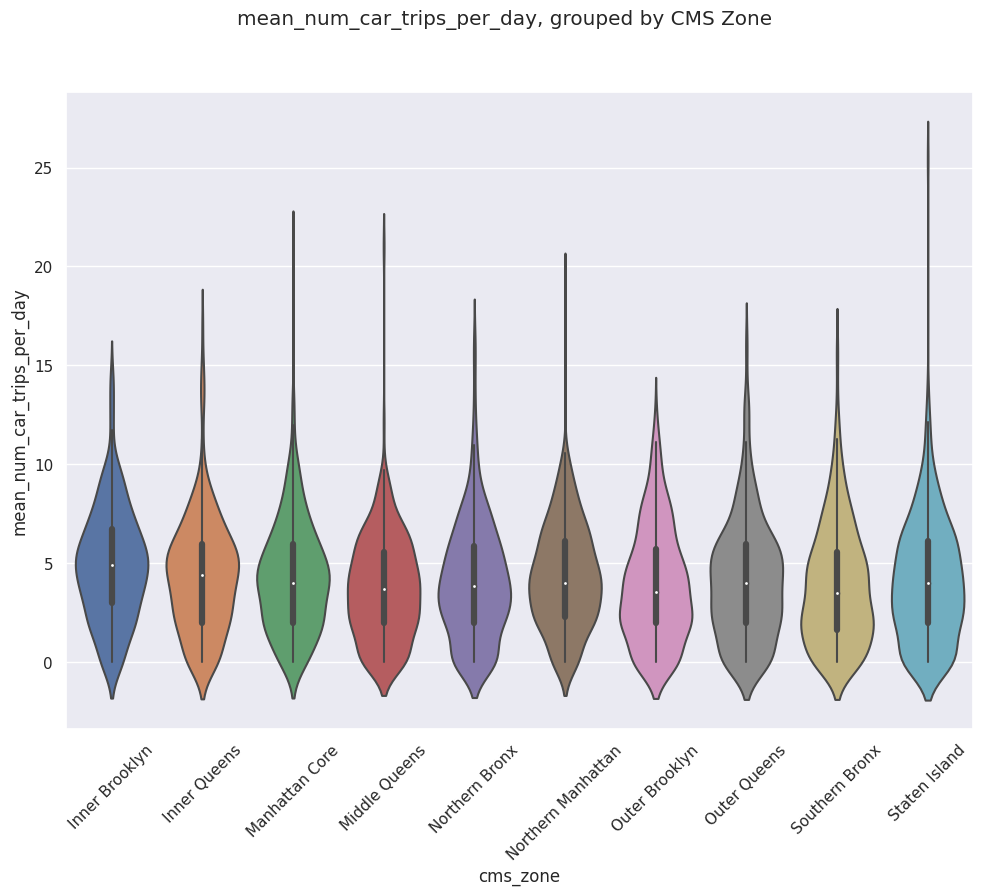

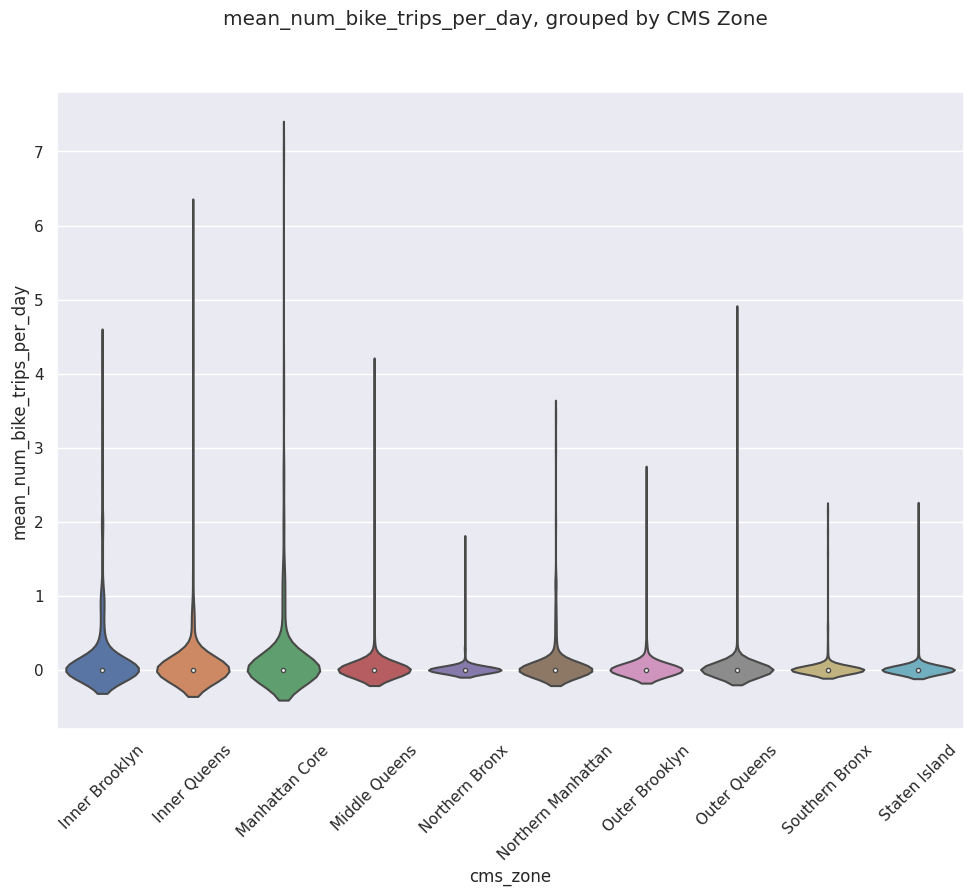

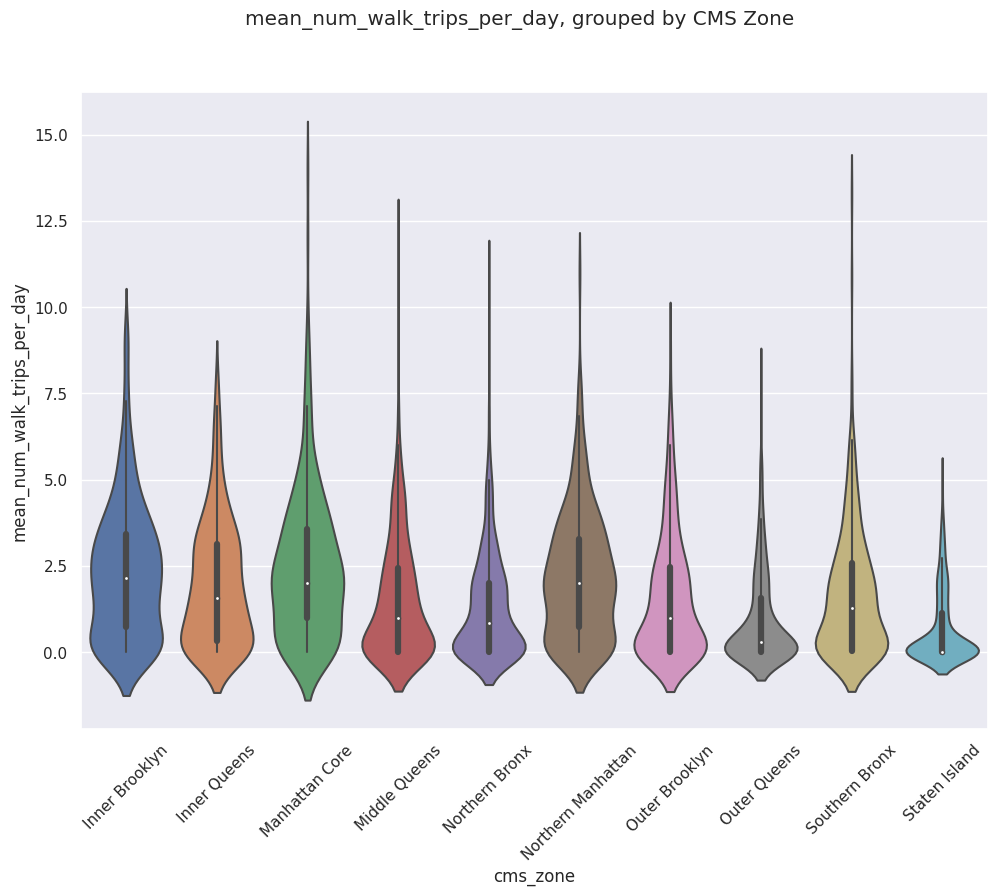

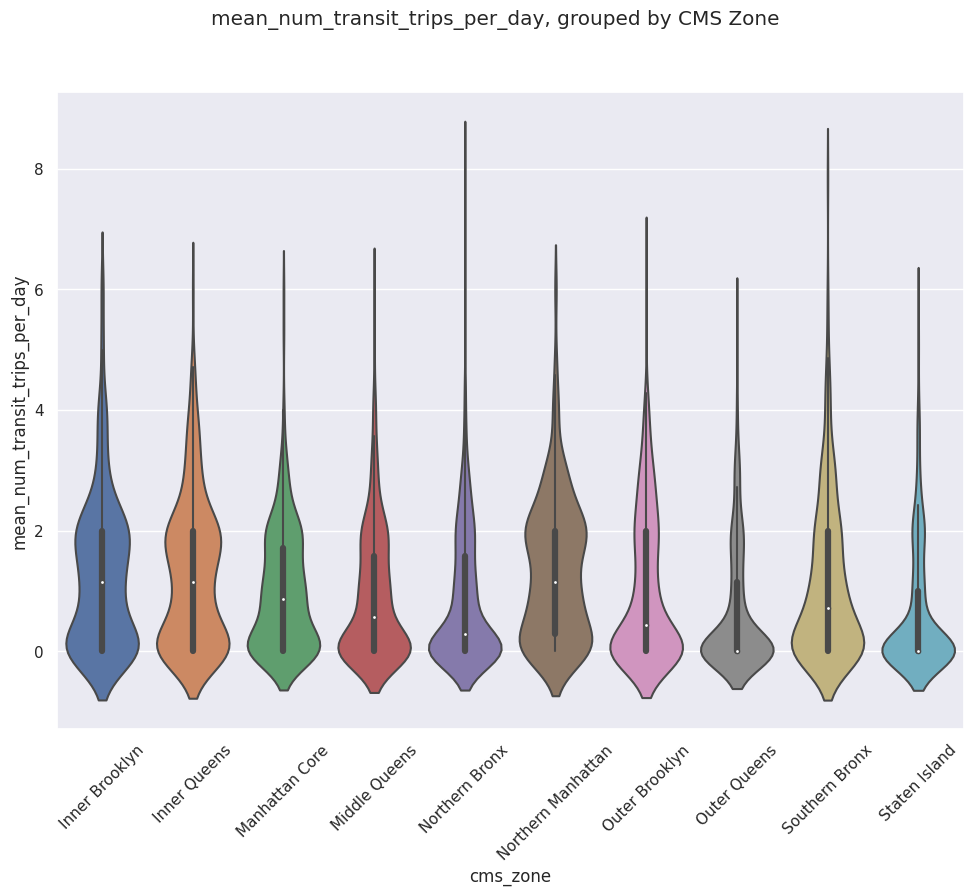

In [90]:
metrics = ['mean_num_car_trips_per_day', 'mean_num_bike_trips_per_day', 'mean_num_walk_trips_per_day', 'mean_num_transit_trips_per_day']
sns.set(rc={'figure.figsize':(11.7,8.27)})

for m in metrics:
    
    plt.suptitle(f'{m}, grouped by CMS Zone')
    plt.xticks(rotation=45)
    
    sns.violinplot(x='cms_zone', y=m, data=df, scale='width')
    
    plt.show()

We can see that although the car usage is essentially the same across all city zones, walking and public transit are more popular in the more central areas of New York, namely Manhattan Core and Northern as well as the inner parts of Brooklyn and Queens. We verify that this is the case by looking at numerical data for `mean_num_walk_trips_per_day`.

In [15]:
df['mean_num_walk_trips_per_day'].describe()

count    3346.000000
mean        1.636239
std         1.814246
min         0.000000
25%         0.000000
50%         1.142857
75%         2.714286
max        14.000000
Name: mean_num_walk_trips_per_day, dtype: float64

In [16]:
df.groupby('cms_zone')['mean_num_walk_trips_per_day'].describe()

,count,mean,std,min,25%,50%,75%,max
cms_zone,,,,,,,,
Inner Brooklyn,314.0,2.343949,1.987669,0.0,0.714286,2.142857,3.428571,9.285714
Inner Queens,298.0,1.999521,1.829558,0.0,0.321429,1.571429,3.142857,7.857143
Manhattan Core,301.0,2.484101,2.180643,0.0,1.000000,2.000000,3.571429,14.000000
Middle Queens,310.0,1.533180,1.783189,0.0,0.000000,1.000000,2.428571,12.000000
Northern Bronx,416.0,1.326236,1.572923,0.0,0.000000,0.857143,2.000000,11.000000
Northern Manhattan,315.0,2.192744,1.839766,0.0,0.714286,2.000000,3.285714,11.000000
Outer Brooklyn,312.0,1.619048,1.806096,0.0,0.000000,1.000000,2.464286,9.000000
Outer Queens,361.0,0.946973,1.320265,0.0,0.000000,0.285714,1.571429,8.000000
Southern Bronx,346.0,1.682907,1.834490,0.0,0.035714,1.285714,2.571429,13.285714


Here we in fact see that means are not the same across city zones, which leads us to believe there might be a difference in means depending on zone or that the two attributes might be correlated, which we will study as our research question in the next section.



# Measures of relatedness
<a name='pt3'></a>

## Study on the relationship between accessible modes of transportation and zones of NYC
<a name=pt3.1></a>


Now, we analyze if a correlation between city zones and the use of accessible transport exists, as we theorized on our visualizations. Accessible transport is defined as a mode of transportation that anyone can use at any point in time, excluding modes like by car or by bike since they require owning their respective vehicles.

To begin, we need to find out which of the two easily accessible modes of transportation is preferred by NYC citizens: walking or public transport.

### Finding a candidate variable
<a name='pt3.1.1'></a>



Just looking at the data, walking would seem to be more popular than using public transport. However, there are a few steps we must take to ensure this is not chance or a misrepresentation on the dataset.

To start, we study a variable that might represent the popularity of walking in the survey population: `work_mode`: the mode of transportation chosen to move to the workplace, which is generally the same as your preferred means of transportation. We use this as a proxy to study relationships between respondent's preferred mode of transportation and other variables.

Since we will want to study whichever of the two means of transportation we pick and their behaviour related to city zones, we study correlation between `work_mode` and `cms_zone`, to see if there is a preference of mode of transport dependent on where in the city a person lives.

However, classic correlation metrics do not work since both are really categorical nominal variables. To analyze if a correlation exists, we use [Cramér's V](https://en.wikipedia.org/wiki/Cramér%27s_V), also known as $\phi_c$. We define the following function to calculate it. (modified from [source](https://www.statology.org/cramers-v-in-python/) to include a [bias correction](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V#Bias_correction). Note that `scikit.stats.contingency.association` does not implement this correction factor).

In [87]:
def cramer_v_corrected(df, cat1, cat2):
    # Columns are expected to be encoded, not as raw strings

    col1 = df[cat1]
    col2 = df[cat2]
    # Convert data into np matrix style expected by scipy.stats
    matrix = np.array([col1, col2])
    
    k, r = matrix.shape
    n = np.sum(matrix)
    
    # Bias correction
    correction_factor = ((k - 1) * (r - 1))/(n - 1)
    phi2 = stats.chi2_contingency(matrix)[0] / n
    phi2_tilde = max(0.0, phi2 - correction_factor)
    
    k_tilde = k - ( (k-1)**2 / n - 1 )
    r_tilde = r - ( (r-1)**2 / n - 1 )
    
    min_dim = min(k_tilde, r_tilde)-1
    
    v = np.sqrt( phi2 / min_dim)
    return v

In [88]:
df_tmp = df.copy()
df_tmp['cms_zone'] = LabelEncoder().fit_transform(df_tmp['cms_zone'])
cramer_v_corrected(df_tmp, 'work_mode', 'cms_zone')

0.17496516731175685

This indicates a low correlation between the two, leading us to believe that the preferred mode of transportation is somwewhat independent of the region of the city they live in.

To continue we perform a T-Test to study if there is a signifficant difference between the means of the modes' mean number of trips per day. We now study the normality of both variables to determine which test to use.

In [21]:
pingouin.normality(df['mean_num_transit_trips_per_day'])

,W,pval,normal
mean_num_transit_trips_per_day,0.823212,0.0,False


In [22]:
pingouin.normality(df['mean_num_walk_trips_per_day'])

,W,pval,normal
mean_num_walk_trips_per_day,0.840016,0.0,False


Since neither follows a normal distribution, we use Wilcoxon's rank-sum test as our T-Test. We propose $H_0$, the null hypothesis stating that there is no difference between the means of both modes, and the alternative hypothesis $H_1$ stating that the mean number of walking trips per day is higher than that of public transit.

In [33]:
walk = df["mean_num_walk_trips_per_day"]
transit = df["mean_num_transit_trips_per_day"]

pingouin.mwu(walk, transit, alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,6678017.5,greater,1.484896e-44,-0.192959,0.59648


The test returns a value of $p=1.485e-44$, which with a 99% confidence we can say rejects the null hypothesis $H_0$ and suggests a very strong signifficance in the difference between means. This means we can say with reasonably strong confidence that walking is the preferred mode of accessible transportation throughout New York City. 

We move on to calculating measures of correlation related to our chosen mean of transportation for analysis: Walking.

### Correlation analysis
<a name=pt3.1.2></a>

Secondly, we study direct statistics describing correlation between the two 

Unfortunately, typical correlation measures such as Pearson's coefficient cannot apply here since one of our variables is categorical. To measure correlation, we will use the correlation ratio, or $\eta^2$. We define the following function to calculate it. [(source)](https://en.wikipedia.org/wiki/Correlation_ratio)

In [24]:
def correlation_ratio(data, dependent, independent_cat):
    ungrouped_mean= data[dependent].mean()
    
    groups = df.groupby(independent_cat)[dependent]

    ni = groups.count()
    
    weighted_sum_of_squares = ( ni * (groups.mean() - ungrouped_mean  )**2 ).sum()
    sums_of_squares = ( ( df[dependent] - ungrouped_mean )**2 ).sum()
    
    return weighted_sum_of_squares / sums_of_squares

To demonstrate, we study a possible correlation between our variable of interest `mean_num_walk_trips_per_day` and a categorical variable, `age`.

In [25]:
eta2 = correlation_ratio(df, 'mean_num_walk_trips_per_day', 'age')
np.sqrt(eta2)

0.17643142389945674

This indicates a very low correlation between the two.

We now study the correlation ratio between our two variables: `mean_num_walk_trips_per_day` and `cms_zone`

In [26]:
eta2 = correlation_ratio(df, 'mean_num_walk_trips_per_day', 'cms_zone')
np.sqrt(eta2)

0.3128400712834084

To compare, we study the same metric for `mean_num_car_trips_per_day`, where the violin plot looked almost identical for all groups:

In [27]:
eta2 = correlation_ratio(df, 'mean_num_car_trips_per_day', 'cms_zone')
np.sqrt(eta2)

0.10339766416435475

In fact we see the correlation ratio is much lower. The previous ratio however remains quite low, and this could be due to the fact that only two of the groups appeared signifficantly different in our violin plot visualization, out of the 10 groups present.

The two variables seem to be very weakly correlated. We move on to testing our research question using Hypothesis Testing.

### Hypothesis testing
<a name='pt3.1.3'></a>

To use the adequate type of hypothesis testing, we determine if the groups of our transportation mode are normally distributed.


In [28]:
pingouin.normality(df, dv='mean_num_walk_trips_per_day', group='cms_zone')

,W,pval,normal
Northern Bronx,0.805317,5.107890e-22,False
Middle Queens,0.815623,1.682224e-18,False
Southern Bronx,0.830863,8.849605e-19,False
Staten Island,0.701010,3.100721e-25,False
Outer Brooklyn,0.844114,4.405615e-17,False
Northern Manhattan,0.923480,1.284409e-11,False
Outer Queens,0.750611,5.754628e-23,False
Inner Brooklyn,0.919236,5.657175e-12,False
Manhattan Core,0.888850,5.164977e-14,False
Inner Queens,0.905852,1.088679e-12,False


Since our variable is not normally distributed we use non-parametric tests.

If we are interested in only two of the groups, we perform a T-Test. For example, we will look at if inside the district of Queens, if a difference exists in means depending on if we select a `cms_zone` closer to the center (Inner Queens) or further from it (Outer Queens). Recall that Outer Queens was one of the outliers in the violin plot visualization regarding `mean_num_walk_trips_per_day`.

Therefore we pose the null hypothesis, $H_0$ stating that there is no difference between the means of both city zones. Since we postulated that zones closer to the city center have a higher mean number of daily walk trips, we pose $H_1$, the alternative hypothesis as Inner Queens having a higher mean number of daily walk trips than its Outer zone counterpart.

As stated previously, `mean_num_walk_trips_per_day` follows a non-parametric distribution so we use Wilcoxon's rank sum test as our T-Test.

In [29]:
inner_queens = df.loc[ df['cms_zone'] == 'Inner Queens' ]['mean_num_walk_trips_per_day']
outer_queens = df.loc[ df['cms_zone'] == 'Outer Queens' ]['mean_num_walk_trips_per_day']


pingouin.mwu(inner_queens, outer_queens, alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,73411.0,greater,1.196931e-16,-0.364796,0.682398


The T-Test reveals that within a 99% confidence interval, there is a statistically signifficant difference between both groups ($p=1.197-16$). We therefore reject the Null Hypothesis $H_0$ and state there is a very statistically signifficant difference.

Now looking at all groups at once, we analyze if there is a statistically significant difference in the mean number of walk trips per day for each city zone.

To do this, we postulate $H_0$ as the null hypothesis, stating there is no difference in the means of the different groups, and $H_1$ or the alternative hypothesis that there is a difference depending on the group. We perform Kruskal-Wallis testing to answer this question, since we are dealing with many different groups.

In [30]:
pingouin.kruskal(data=df, dv='mean_num_walk_trips_per_day', between='cms_zone')

,Source,ddof1,H,p-unc
Kruskal,cms_zone,9,372.314149,1.096837e-74


The One-Way Kruskal-Wallis reveals that, within a 99% confidence interval, there is a statistically signifficant difference between at least two of the 10 studied groups
$(\chi^2 = 372.314, p= 1.097e-74, df=9)$, which we know to be true thanks to the previous T-Test that already showed there was a difference between at least two groups.

We therefore reject the Null Hypothesis $H_0$ that stated there was no statistically significant difference between the groups. Furthermore, since the p-value is so close to 0 we can state there exists a very statistically signifficant difference.



### Study conclusions
<a name='pt3.1.4'></a>

This means we can now answer our research question regarding the relationship between `mean_num_walk_trips_per_day` and `cms_zone`: There exists a statistically signifficant relationship between both variables. 

This might be due to proximity to the city center, where walkability is probably higher. This was reinforced by a previous test where the inner and outer parts of the district of Queens were compared and the inner part, which was closer to the center was shown to have a statistically significantly higher mean of walk trips per day.

In addition, we recall previous conclusions reached by the survey, where we established that walking was preferred over the use of public transport and that, using the mode of transportation to work as proxy for preference, there is no relationship between the preferred mode of transportation and the city zone the respondent lives in. 